In [1]:
## インポート
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import jpy_datareader.data as web
from dotenv import load_dotenv

# e-StatのAPI_KEY
'''
「pythonで環境ファイルを読み込む」を参照
https://zenn.dev/nakashi94/articles/9c93b6a58acdb4
'''
load_dotenv()
api = os.environ.get("API_KEY")

In [2]:
df = web.DataReader("0003225420", "estat", api_key=api)
df

,年齢階級,運動習慣の有無,性別,歩行数,時間軸(年次),人数,割合
0,(再掲)20歳以上,有,女性,"10,000歩以上",2009年,178.0,23.9
1,(再掲)20歳以上,有,女性,"2,000歩-3,999歩",2009年,100.0,13.4
2,(再掲)20歳以上,有,女性,"2,000歩未満",2009年,48.0,6.4
3,(再掲)20歳以上,有,女性,"4,000歩-5,999歩",2009年,155.0,20.8
4,(再掲)20歳以上,有,女性,"6,000歩-7,999歩",2009年,137.0,18.4
...,...,...,...,...,...,...,...
1819,総数,総数,総数,"8,000歩-9,999歩",2010年,592.0,13.8
1820,総数,総数,総数,総数,2009年,4568.0,100.0
1821,総数,総数,総数,総数,2010年,4294.0,100.0
1822,総数,総数,総数,"（再掲）9,200歩(男)/8,300歩(女)以上",2009年,1218.0,26.7


In [3]:
df.to_csv('./data/housu_total.csv')

In [10]:
## データを絞る
'''
時間軸(年次) : 2010年
性別： 総数
歩行数 : '（再掲）9,200歩(男)/8,300歩(女)以上'は除く
'''
age_list =  ['総数']
df2 = df[(df['時間軸(年次)'] == '2010年') & (df['性別'] == '総数') & (df['年齢階級'].isin(age_list)) & ~(df['歩行数'] == '（再掲）9,200歩(男)/8,300歩(女)以上')]
df2.to_csv('./data/housu_total2.csv')
df2

,年齢階級,運動習慣の有無,性別,歩行数,時間軸(年次),人数,割合
1665,総数,有,総数,"10,000歩以上",2010年,330.0,24.4
1667,総数,有,総数,"2,000歩-3,999歩",2010年,195.0,14.4
1669,総数,有,総数,"2,000歩未満",2010年,71.0,5.2
1671,総数,有,総数,"4,000歩-5,999歩",2010年,252.0,18.6
1673,総数,有,総数,"6,000歩-7,999歩",2010年,278.0,20.5
1675,総数,有,総数,"8,000歩-9,999歩",2010年,227.0,16.8
1677,総数,有,総数,総数,2010年,1353.0,100.0
1713,総数,無_その他,総数,"10,000歩以上",2010年,369.0,13.8
1715,総数,無_その他,総数,"2,000歩-3,999歩",2010年,547.0,20.4
1717,総数,無_その他,総数,"2,000歩未満",2010年,304.0,11.4


In [12]:
df2 = pd.read_csv('./data/housu_total2.csv',index_col=0)
df2

,年齢階級,運動習慣の有無,性別,歩行数,時間軸(年次),人数,割合
1665,総数,有,総数,"10,000歩以上",2010年,330.0,24.4
1667,総数,有,総数,"2,000歩-3,999歩",2010年,195.0,14.4
1669,総数,有,総数,"2,000歩未満",2010年,71.0,5.2
1671,総数,有,総数,"4,000歩-5,999歩",2010年,252.0,18.6
1673,総数,有,総数,"6,000歩-7,999歩",2010年,278.0,20.5
1675,総数,有,総数,"8,000歩-9,999歩",2010年,227.0,16.8
1677,総数,有,総数,総数,2010年,1353.0,100.0
1713,総数,無_その他,総数,"10,000歩以上",2010年,369.0,13.8
1715,総数,無_その他,総数,"2,000歩-3,999歩",2010年,547.0,20.4
1717,総数,無_その他,総数,"2,000歩未満",2010年,304.0,11.4


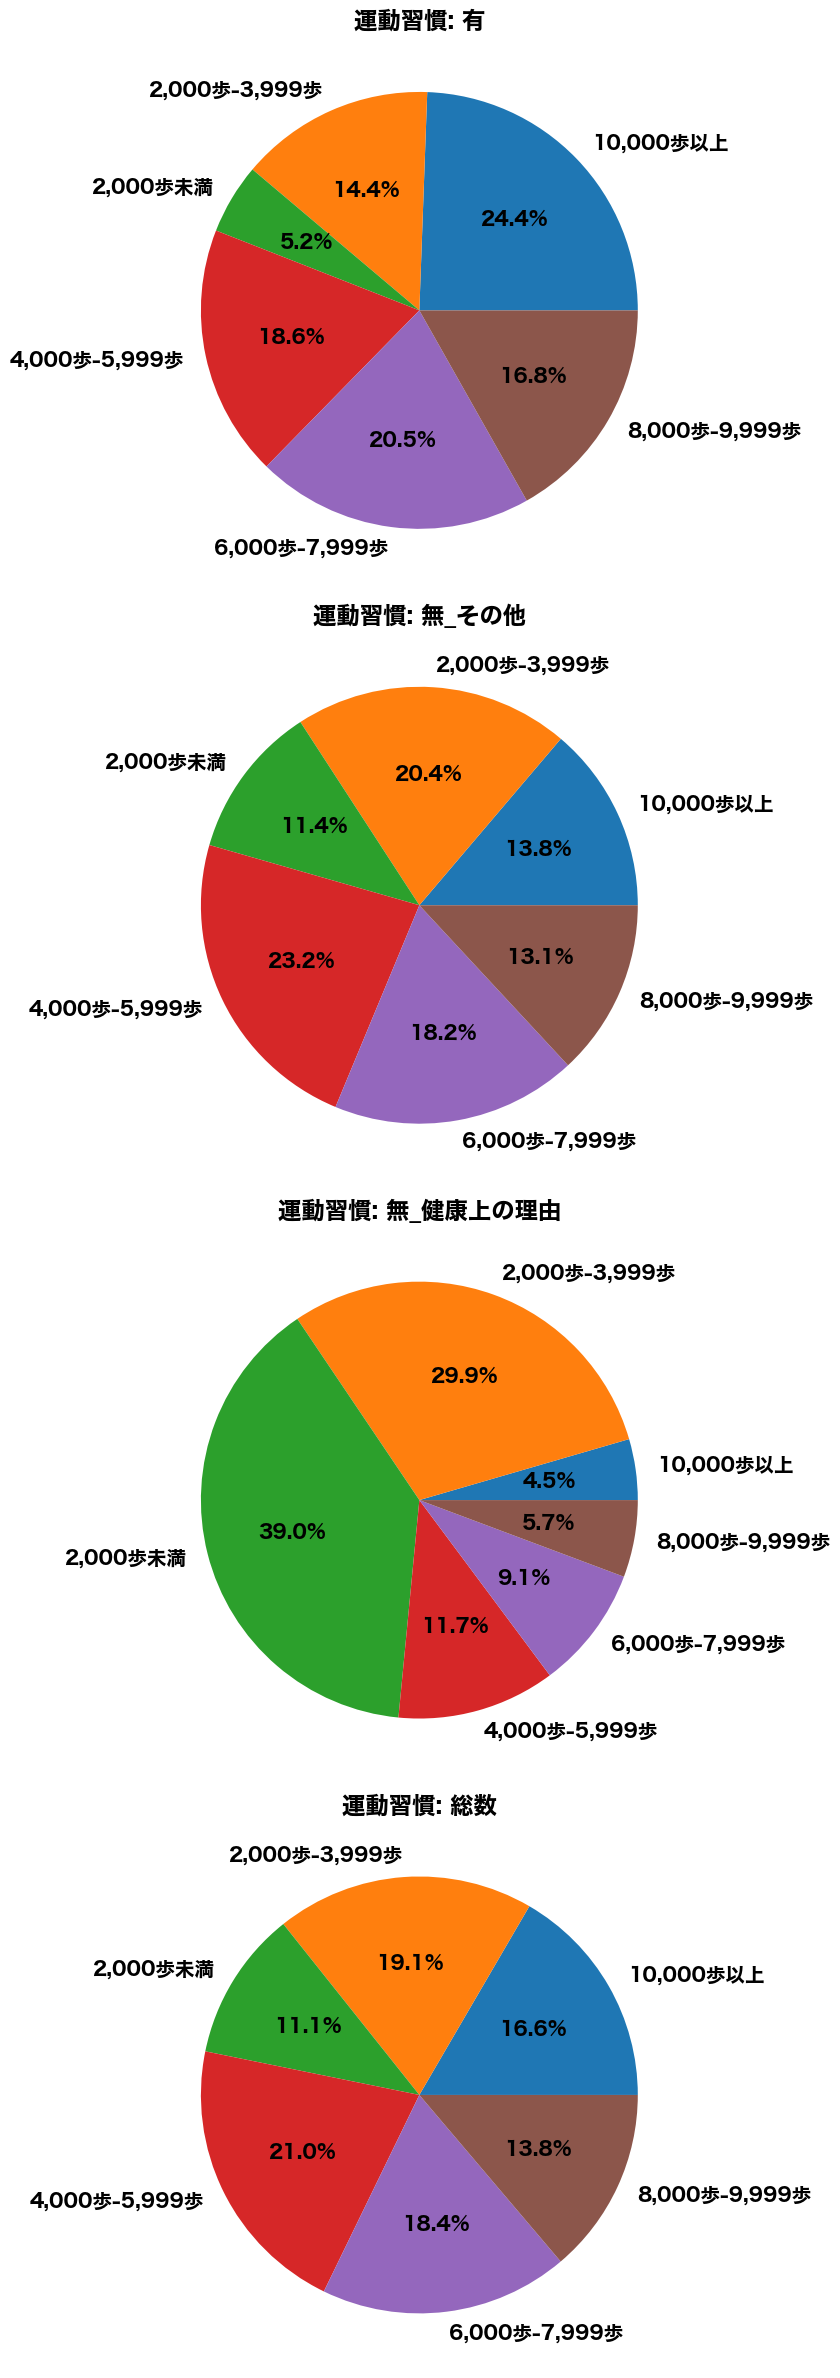

In [4]:
df2 = pd.read_csv('./data/housu_total2.csv',index_col=0)
# 総数行を除外
df2 = df2[df2['歩行数'] != '総数']
# ユニークな運動習慣の有無の数を取得
unique_habits = df2['運動習慣の有無'].unique()

# フォントスタイルの設定
font = {'family': 'Hiragino Sans',  # フォントの種類
        'weight': 'bold',   # フォントの太さ
        'size': 14}         # フォントサイズ

plt.rc('font', **font)  # 全体のフォント設定に適用

# サブプロットを動的に生成
fig, axes = plt.subplots(4,1, figsize=(12, 24))

# もしサブプロットが一つの場合、axesをリスト化
if len(unique_habits) == 1:
    axes = [axes]

# 運動習慣の有無別にループしてグラフ作成
for i, habit in enumerate(unique_habits):
    subset = df2[df2['運動習慣の有無'] == habit]
    axes[i].pie(subset['割合'], labels=subset['歩行数'], autopct='%1.1f%%')
    axes[i].set_title(f'運動習慣: {habit}', fontweight='bold')

plt.tight_layout()
plt.savefig('./img/output.png')
plt.show()